Alejandro Rubio Martínez

Importe de las bibliotecas usadas y la función usada:

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from decimal import *
from sympy.solvers import solve, nsolve
mporig=16

In [41]:
def biseccion(f, a, b, cifras=16, prec=10**(-16), nmax=100):
    a,b = Decimal(a), Decimal(b)
    niter = 0; sale =''
    getcontext().prec = cifras
    tol = 10**(-(cifras))
    for k in range(nmax):
        niter = niter + 1;
        c = a + (b-a)/2
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if np.sign(f(a)) != np.sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ', c)
    elif niter < nmax:
        print('Aproximación solicitada: ', c)
    else:
        print('Se llegó al número máximo de iteraciones con aproximación ', c)
    print('Número total de iteraciones ', niter)

    getcontext().prec = mporig
    return c

In [42]:
def newtonRaphson(f, df, b, cifras=16, prec=10**(-16), nmax=100):
    getcontext().prec = cifras
    x0 = Decimal(b); niter = 0; sale =''
    tol=10**(-(cifras+1))
    
    for k in range(nmax):
        niter = niter + 1;
        x1 = x0 - f(x0)/df(x0)
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1
                    
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif niter < nmax:
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones con aproximación', x1)

    print('Número total de iteraciones ', niter)

    getcontext().prec = mporig
    return x1

Vamos a empezar definiendo la función con la que vamos a trabajar y su respectiva derivada:

In [43]:
x=sp.Symbol('x')
a,b=-4,-3
a0,b0=a,b

def f(x):
    return x**3+Decimal(5.75)*x+46

def df(x):
    return 3*x**2+Decimal(5.75)

Empecemos esbozándola en un intervalo amplio:

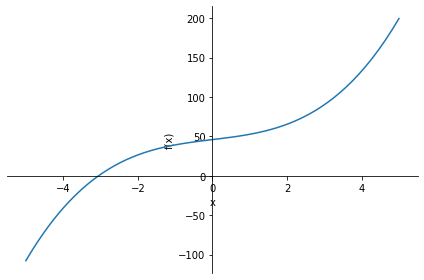

In [44]:
sp.plot(f(x),(x,-5,5))

Vamos a pintarla en el intervalo $[-4,-3]$, que es donde parece que estará su solución real:

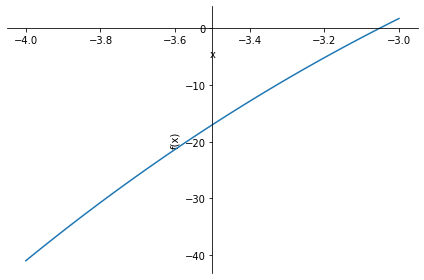

In [45]:
sp.plot(f(x),(x,a,b))

Podemos observar un cambio de signo por lo que en este intervalo se encuentra una raíz.

Antes de utilizar el algoritmo de bisección, vamos a calcular el número de iteraciones necesarias:

In [46]:
n = np.log((b-a)/10**(-2))/np.log(2)-1
print("Numero de iteraciones necesarias: ", np.ceil(n))

Numero de iteraciones necesarias:  6.0


Vamos a buscarla utilizando el método de la bisección con error una décima (cifras significativas = 2). Como hemos calculado antes, podemos especificar que no realiza más de 6 iteraciones.

In [49]:
biseccion(f,a,b,2, 10**(-16),6)
a,b=a0,b0
print("La solución exacta es: ", sp.solve(f(x),x)[0].evalf())

Se llegó al número máximo de iteraciones con aproximación  -3.0
Número total de iteraciones  6
La solución exacta es:  -3.05266834531355


Por errores de redondeo podemos ver como no la encuentra exactamente.

Vamos ahora a usar el algoritmo de Newton-Raphson. Como queremos exactamente 10 iteraciones vamos a proporcionar unos valores muy restrictivos de precisión y tolerancia.

Vamos a escoger de valor b uno cercano, por ejemplo, el -3

In [48]:
newtonRaphson(f,df,b,64,10**(-64),10)
a,b=a0,b0
print("La solución exacta es: ", sp.solve(f(x),x)[0].evalf(n=64))

Se llegó al número máximo de iteraciones con aproximación -3.052668345313549296307278576139257207587998232911502091600874311
Número total de iteraciones  10
La solución exacta es:  -3.052668345313549469466352093149907886981964111328125000000000000
